In [3]:
# numpy 로드하여 np로 사용
# pandas 로드하여 pd로 사용
# matplotlib.pyplot 로드하여 plt로 사용
# seaborn 로드하여 sns로 사용
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


In [4]:
# 세션 저장소에 업로드한 csv 파일을 읽어 변수에 할당
# csv 파일 읽어오기
data = pd.read_csv('../data/인구현황.csv')

In [ ]:
df_sido = data[data['행정기관'] != '전국'].copy()
df_sido

In [7]:
# 1. 지역별 총인구수 5
#  - 지역별 총인구수 plot   x 행정기관 y 총인구수
data[['행정기관','총인구수']].sort_values(by='총인구수', ascending= False)[1:6]


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [8]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

<Axes: title={'center': '지역별 총인구수'}, xlabel='행정기관', ylabel='총인구수'>

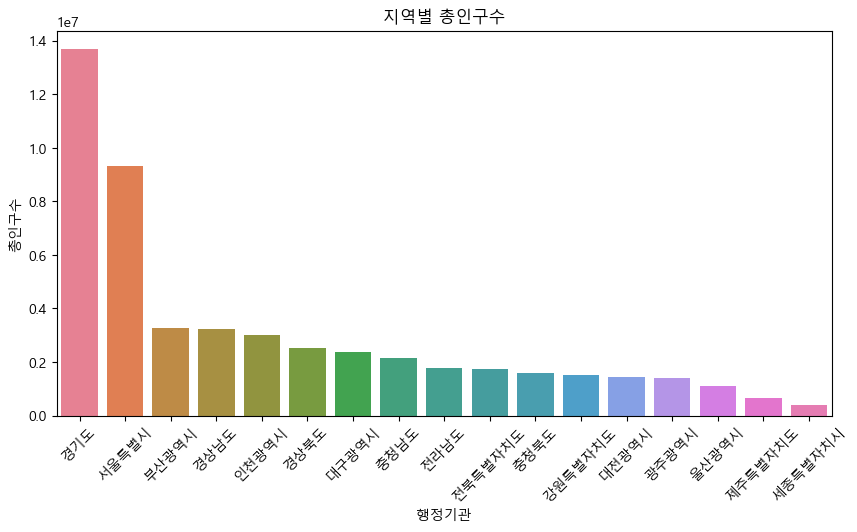

In [9]:
sido_popu= df_sido.sort_values(by='총인구수', ascending= False)
sido_popu


plt.figure(figsize=(10, 5))
plt.xticks(rotation=45)
plt.title('지역별 총인구수')
sns.barplot(data=sido_popu, x='행정기관', y='총인구수', hue='행정기관')


In [10]:
# 2. 세대당 인구수 높은 지역 5     행: x행정기관 y세대당 인구
#  - 지역별 세대당 인구 plot
#data[['행정기관','총인구수']].sort_values(by='총인구수', ascending= False)[1:6]
data[['행정기관','세대당 인구']].sort_values(by= '세대당 인구', ascending= False).head(5).reset_index(drop=True)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


<Axes: title={'center': '지역별 세대당 인구'}, xlabel='행정기관', ylabel='세대당 인구'>

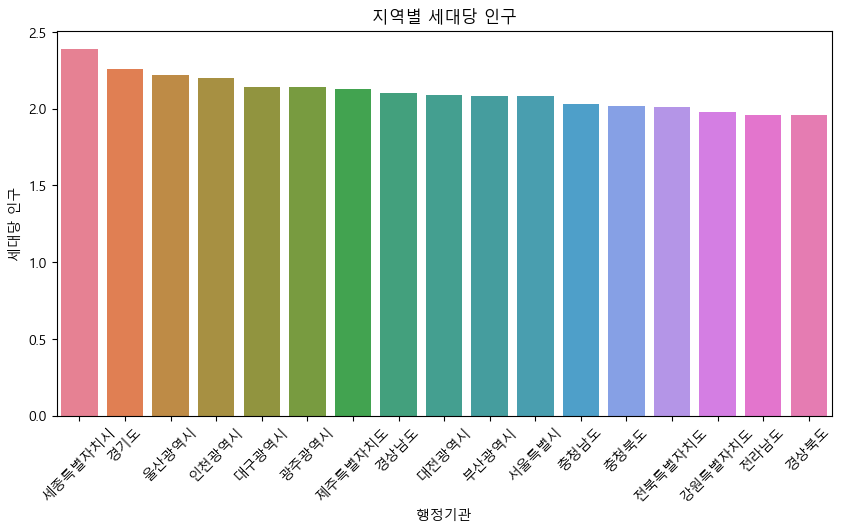

In [11]:
family= df_sido[['행정기관','세대당 인구']].sort_values(by= '세대당 인구', ascending= False)
family

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('지역별 세대당 인구')
sns.barplot(family, x= '행정기관', y='세대당 인구', hue='행정기관')

In [12]:
# 3. 남녀 비율 분석     행정기관/ 남여 비율
#  - 남녀 비율 분석 plot
df_sido[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending= False).reset_index(drop=True)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


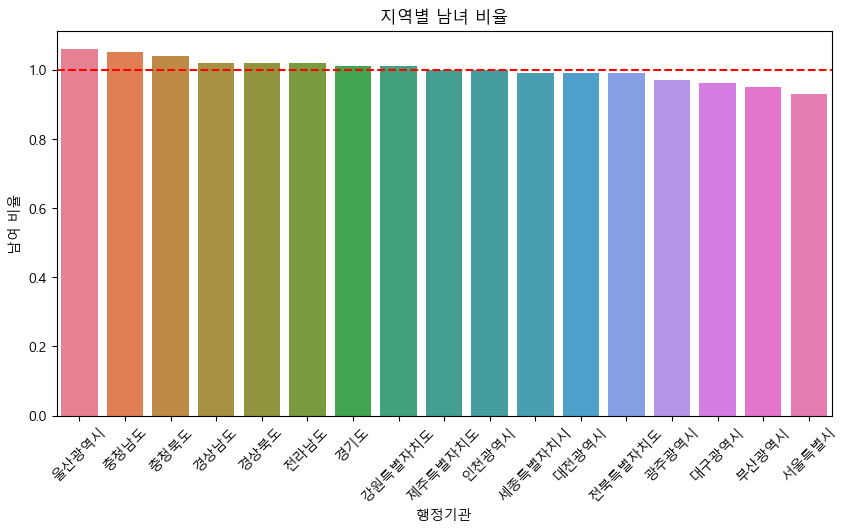

In [13]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('지역별 남녀 비율')
sns.barplot(df_sido.sort_values(by='남여 비율',ascending=False), x='행정기관', y= '남여 비율',hue='행정기관')
plt.axhline(y=1, color='red', linestyle='--')

In [ ]:
df_sido['남초여초']= df_sido['남여 비율'].apply(lambda x: '남초' if x > 1.0 else ('여초' if x < 1.0 else '동일'))

df_sido[['행정기관', '남여 비율', '남초여초']]

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [ ]:
avg = df_sido['세대당 인구'].mean()
print(f'전국 평균 세대당 인구수: {avg:.2f}')

df_sido[df_sido['세대당 인구']> avg].sort_values(by= '세대당 인구', ascending= False)[['행정기관', '세대당 인구']].reset_index(drop=True)

전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


<Axes: title={'center': '지역별 세대수'}, xlabel='행정기관', ylabel='세대수'>

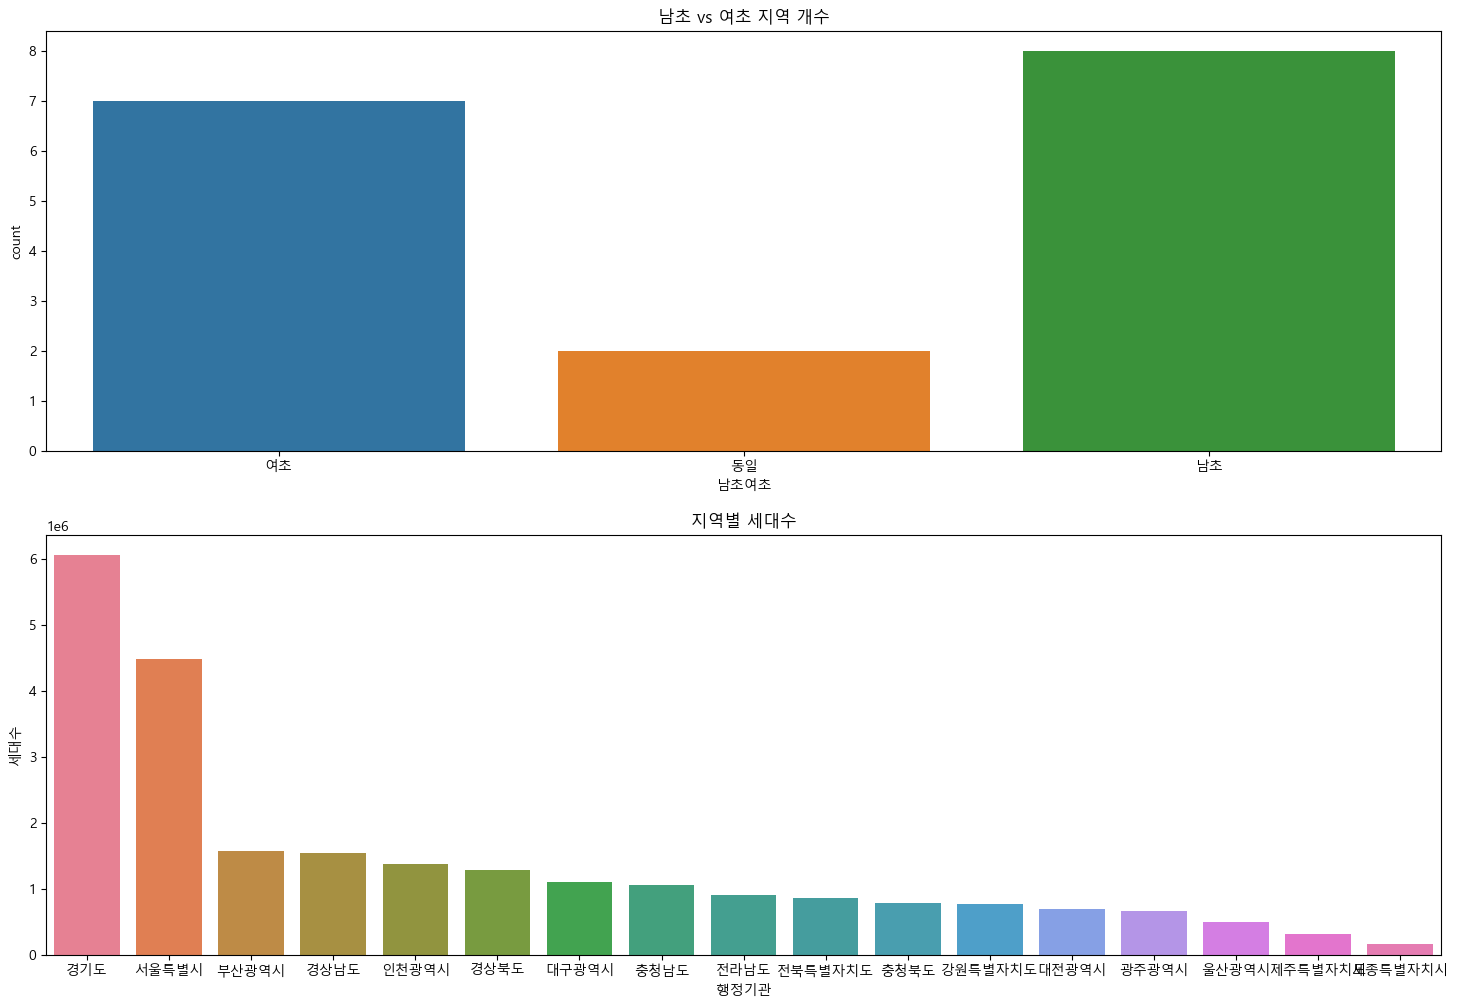

In [48]:
figure,(axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)


axes1.set_title('남초 vs 여초 지역 개수')
sns.countplot(data= df_sido, x='남초여초', hue='남초여초', ax= axes1)


axes2.set_title("지역별 세대수")
sns.barplot(x='행정기관', y ='세대수',data=df_sido.sort_values(by='세대수', ascending=False), hue='행정기관', ax= axes2)

In [ ]:
# #plt.data[['남자 인구수', '여자 인구수']]
# figure, axes1= plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18,12)

# df_melted = df_sido.melt(id_vars='행정기관', value_vars=['남자 인구수', '여자 인구수'], 
#                          var_name='성별', value_name='인구수')

# sns.barplot(data=df_melted, x='행정기관', y='인구수', hue='성별', 
#             palette={'남성': 'blue', '여성': 'red'}, ax=axes1)

# axes1.set_title('남성 vs 여성 인구 비교')
# axes1.set_ylabel('')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()